<a href="https://colab.research.google.com/github/Yhemisol/4B1b/blob/master/ML13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Set the PRNG
import numpy as np
np.random.seed(1)

In [ ]:
# K means clustering
from sklearn import cluster, datasets
X_iris, y_iris = datasets.load_iris(return_X_y=True)

k_means = cluster.KMeans(n_clusters=3)
k_means.fit(X_iris)
print(k_means.labels_[::10])
print(y_iris[::10])

[1 1 1 1 1 0 0 0 0 0 2 2 2 2 2]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Vector quantization
import scipy as sp
try:
   face = sp.face(gray=True)
except AttributeError:
   from scipy import misc
   face = misc.face(gray=True)
X = face.reshape((-1, 1)) # We need an (n_sample, n_feature) array
k_means = cluster.KMeans(n_clusters=5, n_init=1)
k_means.fit(X)
values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_
face_compressed = np.choose(labels, values)
face_compressed.shape = face.shape

<ipython-input-3-5d85a4c5d9b3>:7: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  face = misc.face(gray=True)


In [ ]:
# Hierarchical agglomerative clustering
from skimage.data import coins
from scipy.ndimage import gaussian_filter
from skimage.transform import rescale
rescaled_coins = rescale(
    gaussian_filter(coins(), sigma=2),
    0.2, mode='reflect', anti_aliasing=False
)
X = np.reshape(rescaled_coins, (-1, 1))

In [ ]:
from sklearn.feature_extraction import grid_to_graph
connectivity = grid_to_graph(*rescaled_coins.shape)

In [ ]:
n_clusters = 27  # number of regions

from sklearn.cluster import AgglomerativeClustering
ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward',
                               connectivity=connectivity)
ward.fit(X)
label = np.reshape(ward.labels_, rescaled_coins.shape)

In [ ]:
# Feature agglomeration

digits = datasets.load_digits()
images = digits.images
X = np.reshape(images, (len(images), -1))
connectivity = grid_to_graph(*images[0].shape)

agglo = cluster.FeatureAgglomeration(connectivity=connectivity,
                                     n_clusters=32)
agglo.fit(X)
X_reduced = agglo.transform(X)

X_approx = agglo.inverse_transform(X_reduced)
images_approx = np.reshape(X_approx, images.shape)

In [ ]:
# Principal component analysis: PCA
# Create a signal with only 2 useful dimensions
x1 = np.random.normal(size=(100, 1))
x2 = np.random.normal(size=(100, 1))
x3 = x1 + x2
X = np.concatenate([x1, x2, x3], axis=1)

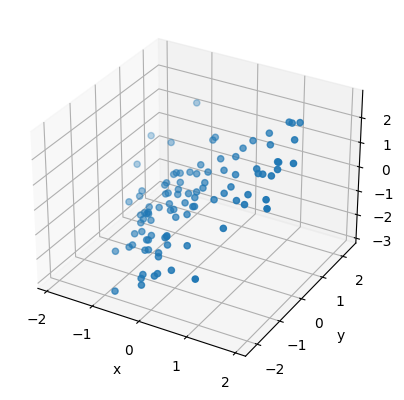

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
_ = ax.set(xlabel="x", ylabel="y", zlabel="z")

In [ ]:
from sklearn import decomposition
pca = decomposition.PCA()
pca.fit(X)
print(pca.explained_variance_)

[2.49275454e+00 8.13591164e-01 1.84735488e-32]


In [ ]:
pca.set_params(n_components=2)
X_reduced = pca.fit_transform(X)
X_reduced.shape

(100, 2)

In [ ]:
# Independent Component Analysis: ICA

# Generate sample data
import numpy as np
from scipy import signal
time = np.linspace(0, 10, 2000)
s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal
S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)  # Add noise
S /= S.std(axis=0)  # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1], [1.5, 1, 2]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

# Compute ICA
ica = decomposition.FastICA()
S_ = ica.fit_transform(X)  # Get the estimated sources
A_ = ica.mixing_.T
np.allclose(X,  np.dot(S_, A_) + ica.mean_)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


True